# Akash Singha FT251009

# Analyzing Employee Attrition and Churn Rates: Insights for Enhanced Retention Strategies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# providing the versions of all the libraries

In [2]:
print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
from sklearn import __version__
print("scikitlearn version :",__version__)
from platform import python_version
print("Python version: ",python_version())
print("Seaborn version: ", sns.__version__)
from matplotlib import __version__
print("Matplotlib version: ", __version__)
from scipy import __version__
print("Scientific Python version: ", __version__)
from statsmodels import __version__
print("Stats Model version: ", __version__)

Pandas version : 2.2.2
Numpy version:  1.26.4
scikitlearn version : 1.5.2
Python version:  3.10.12
Seaborn version:  0.13.2
Matplotlib version:  3.8.0
Scientific Python version:  1.13.1
Stats Model version:  0.14.4


## Reading the data

In [3]:
import pandas as pd
df= pd.read_csv('/content/customer_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **EDA**

# MetaData

**Age**: Employee's age in years.

**Attrition**: Whether the employee has left the company (Yes/No).

**BusinessTravel**: Frequency of business-related travel (e.g., Rarely, Frequently).

**DailyRate**: Daily salary rate of the employee.

**Department**: Department where the employee works (e.g., Sales, R&D).

**DistanceFromHome**: Distance between the employee's home and office (in miles).

**Education**: Highest education level attained (1 to 5).

**EducationField**: Field of study related to employee's education (e.g., Life Sciences).

**EmployeeCount**: Number of employees in the dataset (typically constant).

**EmployeeNumber**: Unique identifier for the employee.

**EnvironmentSatisfaction**: Employee's satisfaction with their work environment (1 to 4).

**Gender**: Employee's gender (Male/Female).

**HourlyRate**: Hourly wage of the employee.

**JobInvolvement**: Level of engagement and involvement in the job (1 to 4).

**JobLevel**: Employee's job level in the organizational hierarchy (1 to 5).

**JobRole**: Designation or role of the employee (e.g., Manager, Sales Executive).

**JobSatisfaction**: Employee's satisfaction with their job (1 to 4).

**MaritalStatus**: Employee's marital status (e.g., Single, Married).

**MonthlyIncome**: Monthly salary of the employee.

**MonthlyRate**: Monthly rate of pay for the employee.

**NumCompaniesWorked**: Number of companies the employee has worked for previously.

**Over18**: Whether the employee is above 18 years old (Yes/No).

**OverTime**: Whether the employee works overtime (Yes/No).

**PercentSalaryHike**: Percentage of salary hike during last appraisal.

**PerformanceRating**: Performance rating of the employee (1 to 4).

**RelationshipSatisfaction**: Satisfaction with personal relationships at work (1 to 4).

**StandardHours**: Standard working hours (typically 8).

**StockOptionLevel**: Employee's stock option level (0 to 3).

**TotalWorkingYears**: Total years of professional experience.

**TrainingTimesLastYear**: Number of training sessions attended last year.

**WorkLifeBalance**: Perception of work-life balance (1 to 4).

**YearsAtCompany**: Number of years the employee has been with the company.

**YearsInCurrentRole**: Number of years spent in the current role.

**YearsSinceLastPromotion**: Years since the employee's last promotion.

**YearsWithCurrManager**: Number of years working under the current manager.

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.dropna(how='all', inplace=True)

In [7]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [8]:
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
# Remove 'EmployeeNumber' and 'EmployeeCount' columns
df = df.drop(['EmployeeNumber', 'EmployeeCount'], axis=1)

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


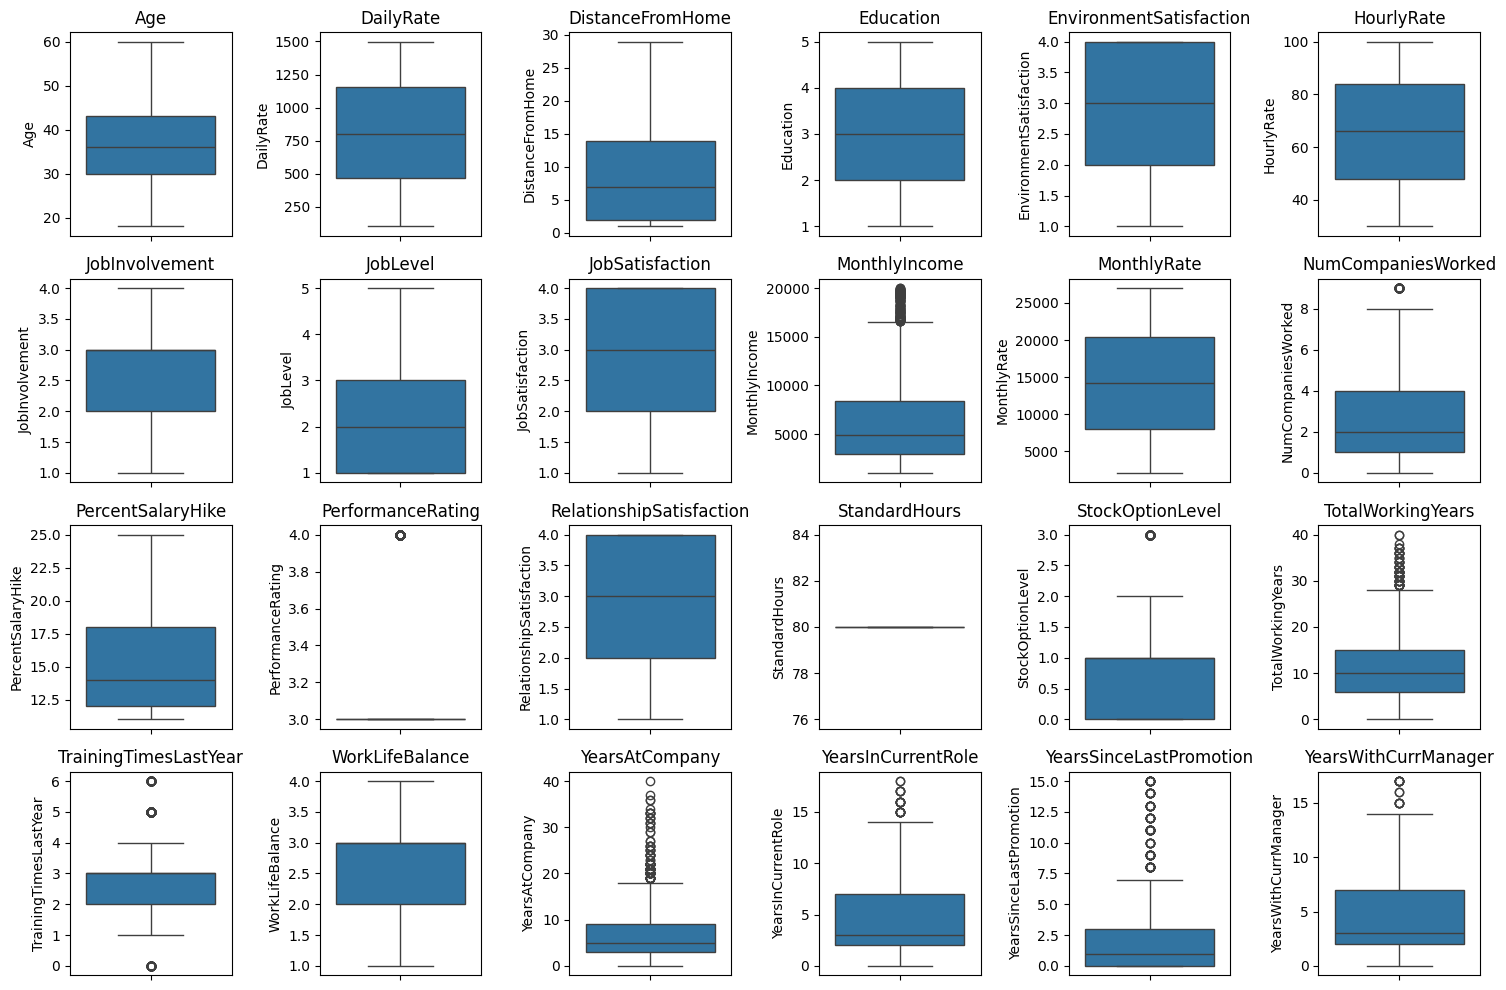

In [13]:
quantitative_cols = df.select_dtypes(include=np.number).columns.tolist()

# Create boxplots for each quantitative variable
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 6, i + 1)  # Adjust the grid layout if needed
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

## High number of outliers in monthly Income

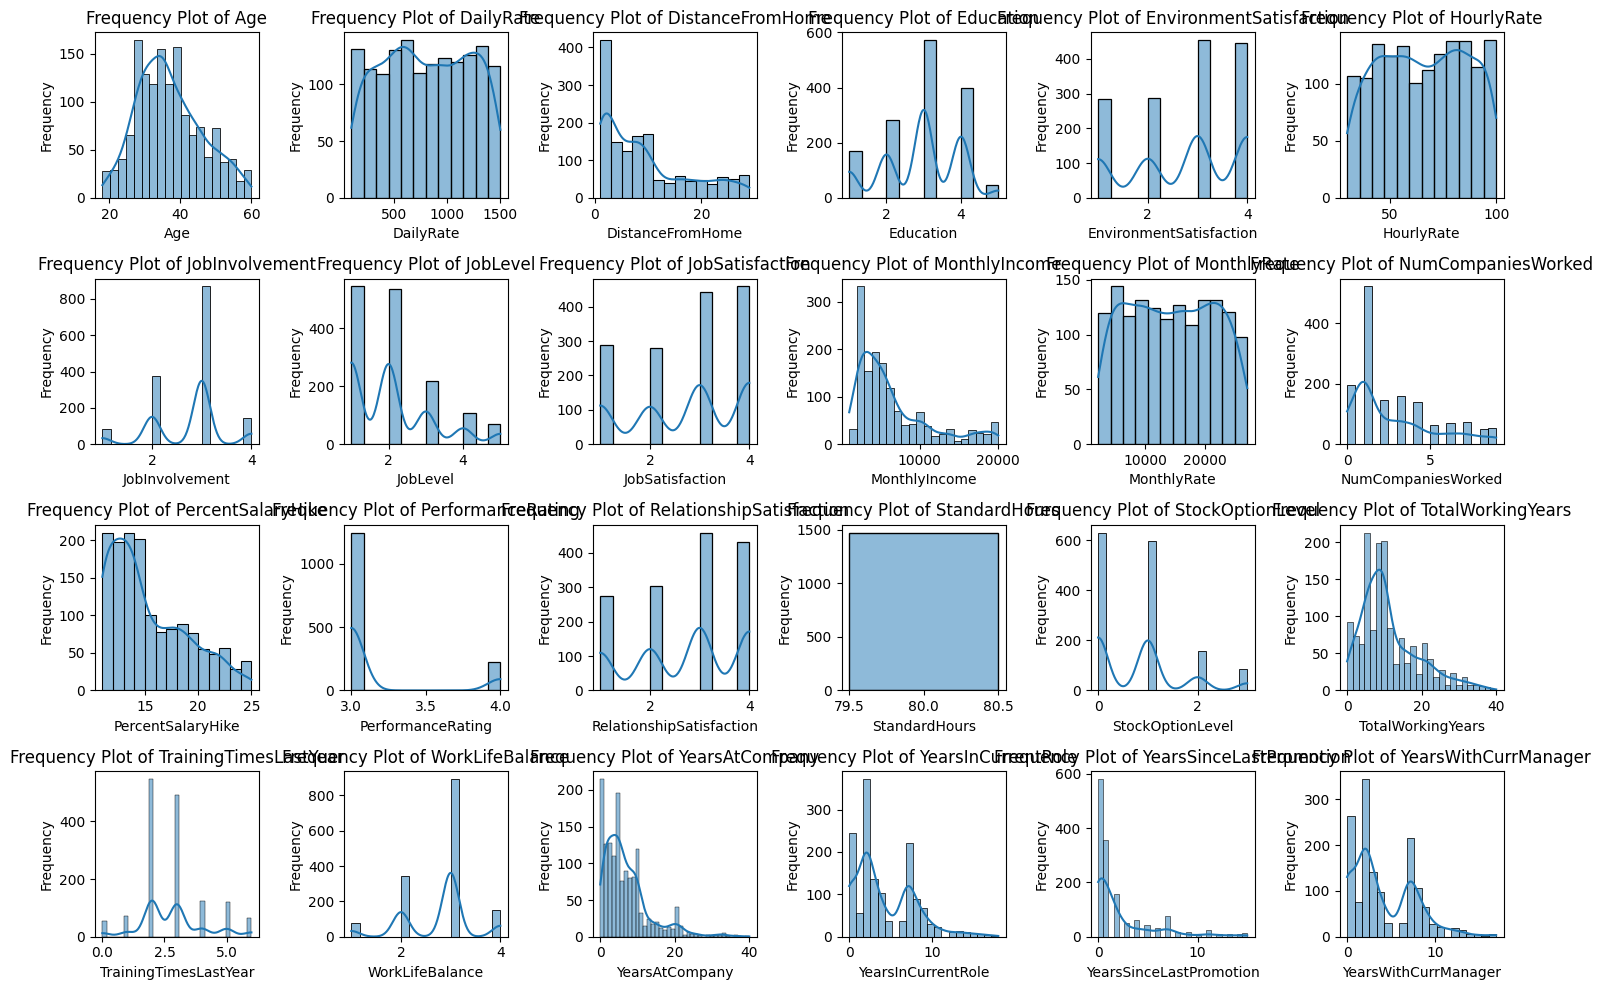

In [15]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 6, i + 1)  # Adjust the grid layout if necessary
    sns.histplot(df[col], kde=True) # kde=True adds a kernel density estimate curve
    plt.title(f'Frequency Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

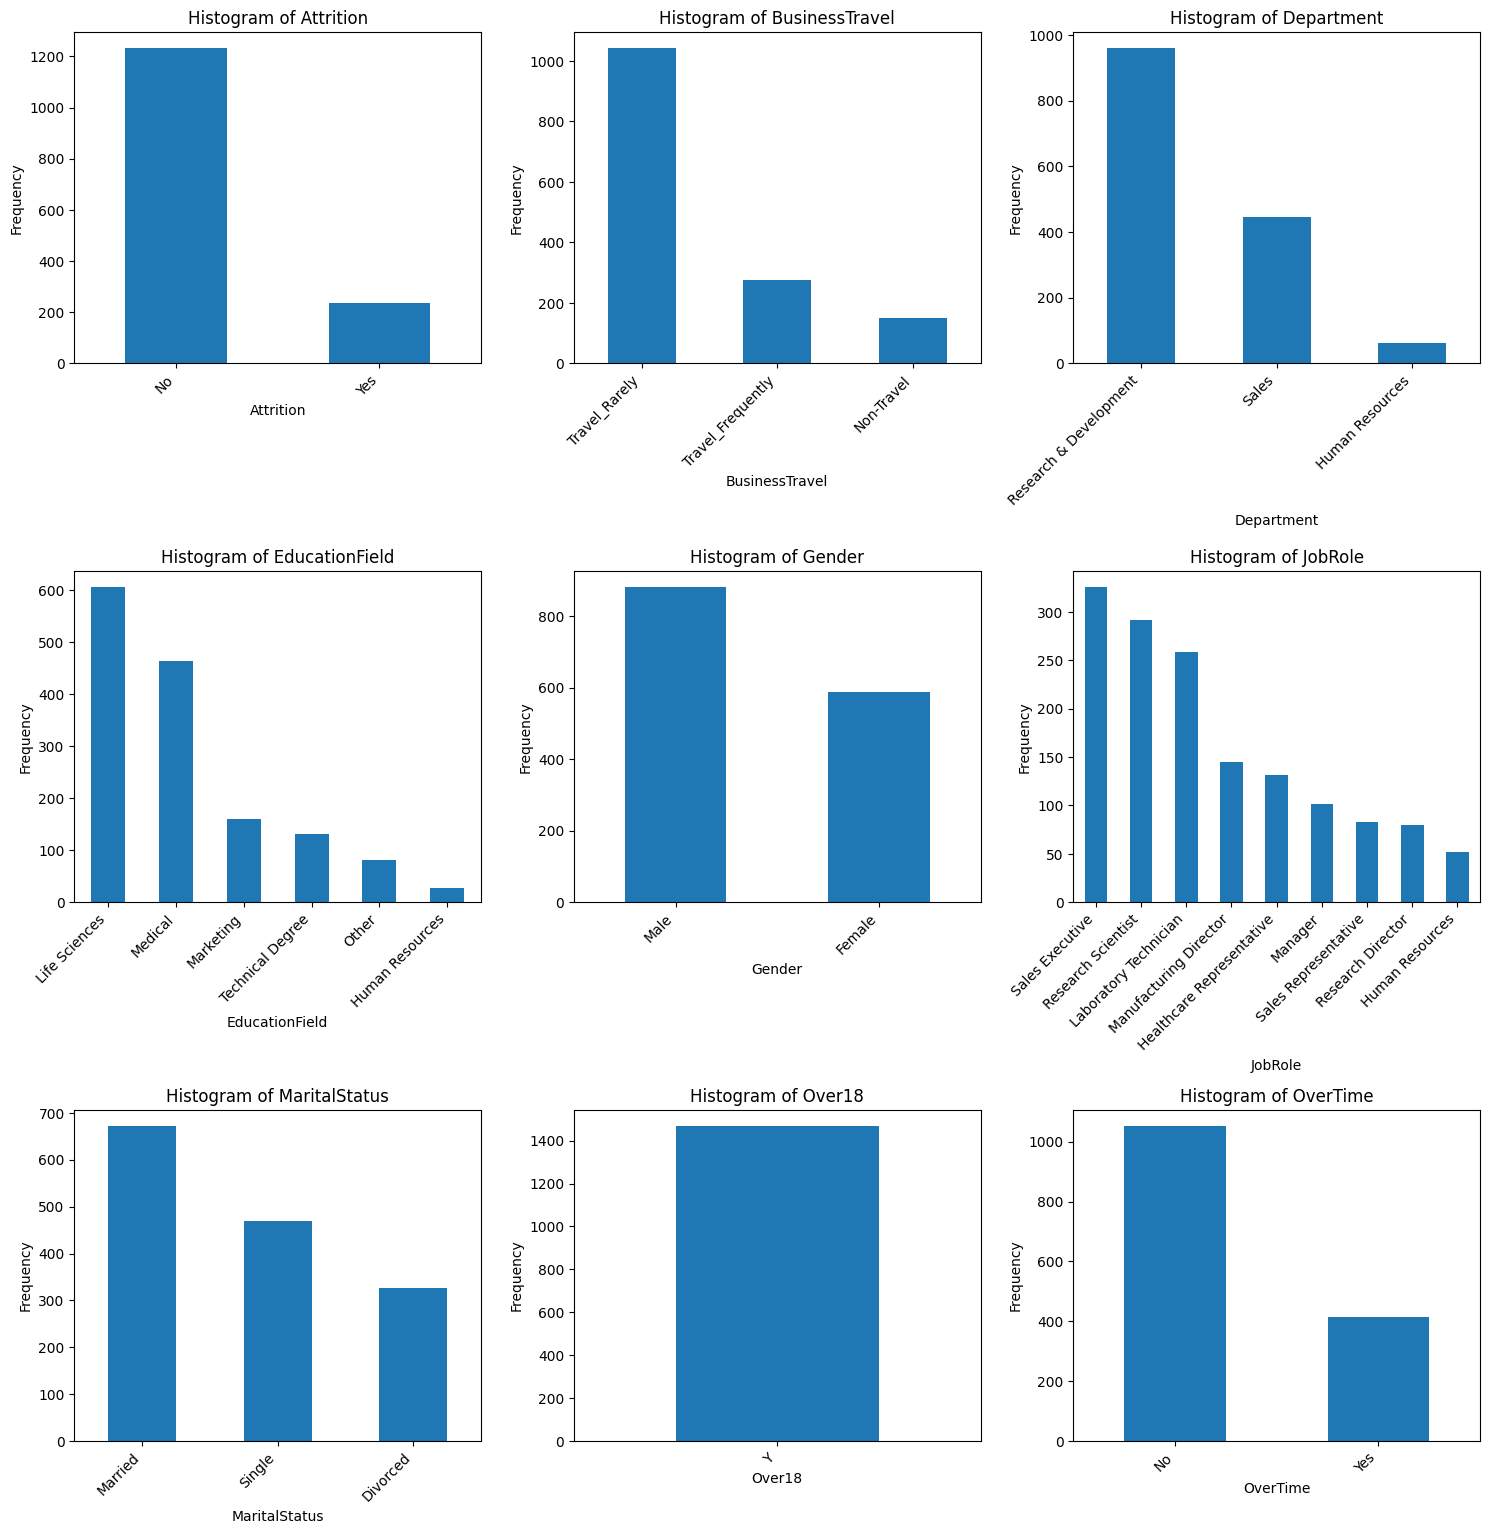

In [16]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create histograms for each categorical variable
plt.figure(figsize=(15, 20))  # Adjust figure size as needed

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)  # Adjust the grid layout if needed
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## Frequency plot analysis:
Overtime has high no values

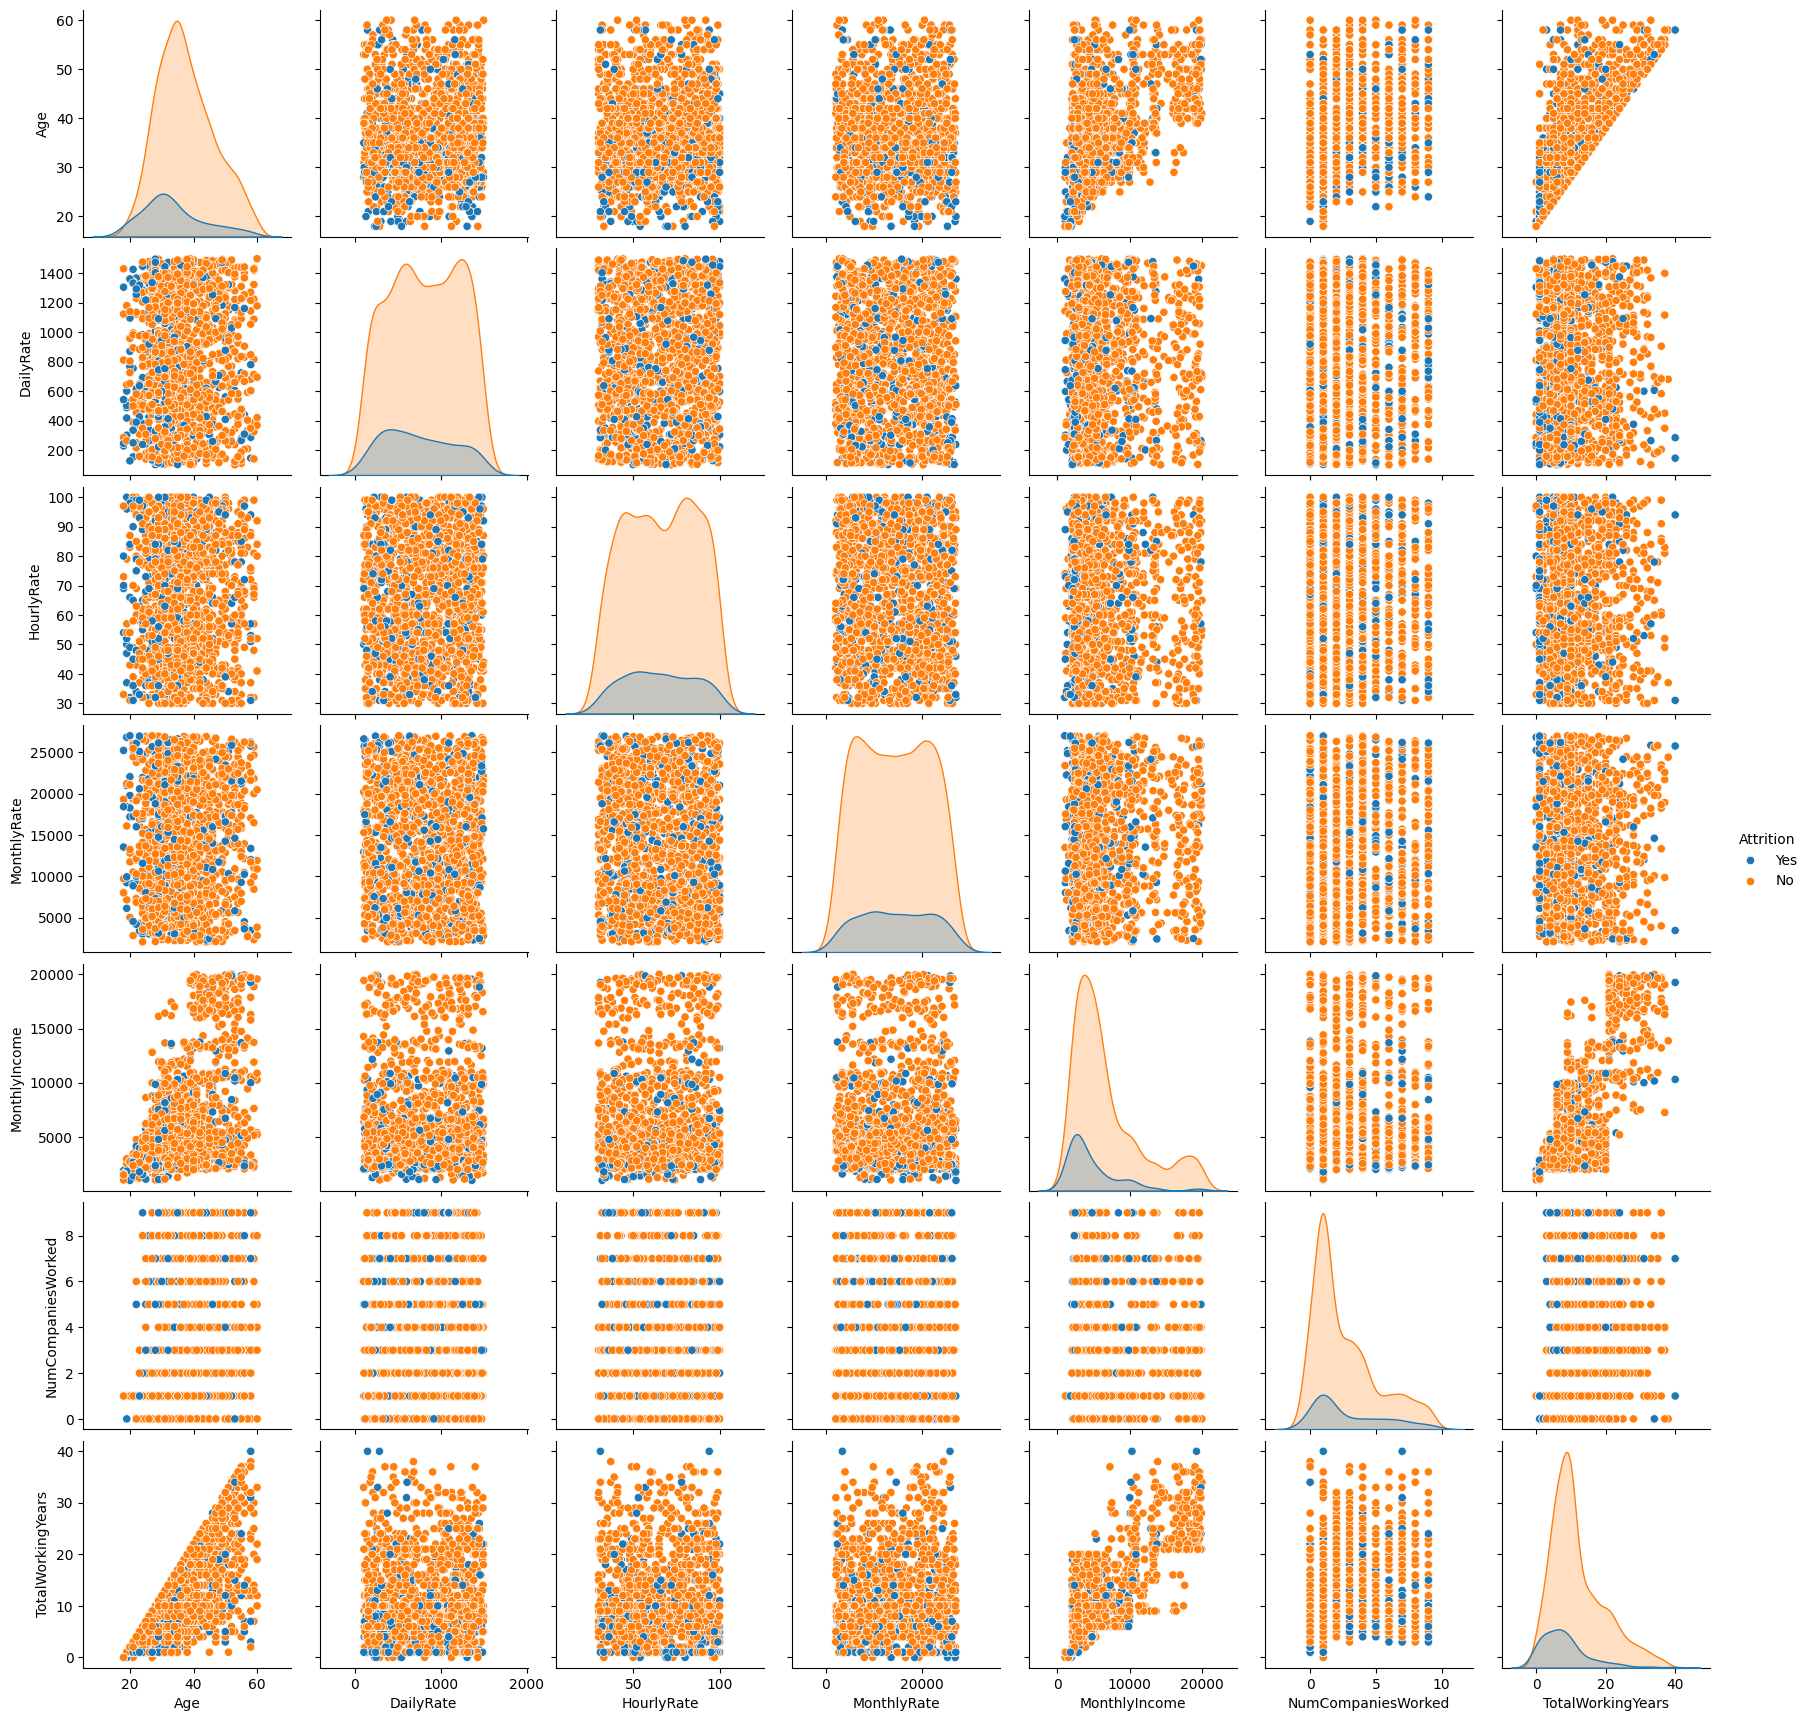

In [20]:
# prompt: do a pairplot analysis on these attributes Age,DailyRate,HourlyRate,MonthlyRate, MonthlyIncome,NumCompaniesWorked,TotalWorkingYears with hue as df['attrition']

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded.
# If not, load it first: df = pd.read_csv('/content/customer_attrition.csv')

attributes = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears']
sns.pairplot(df, vars=attributes, hue='Attrition')
plt.show()

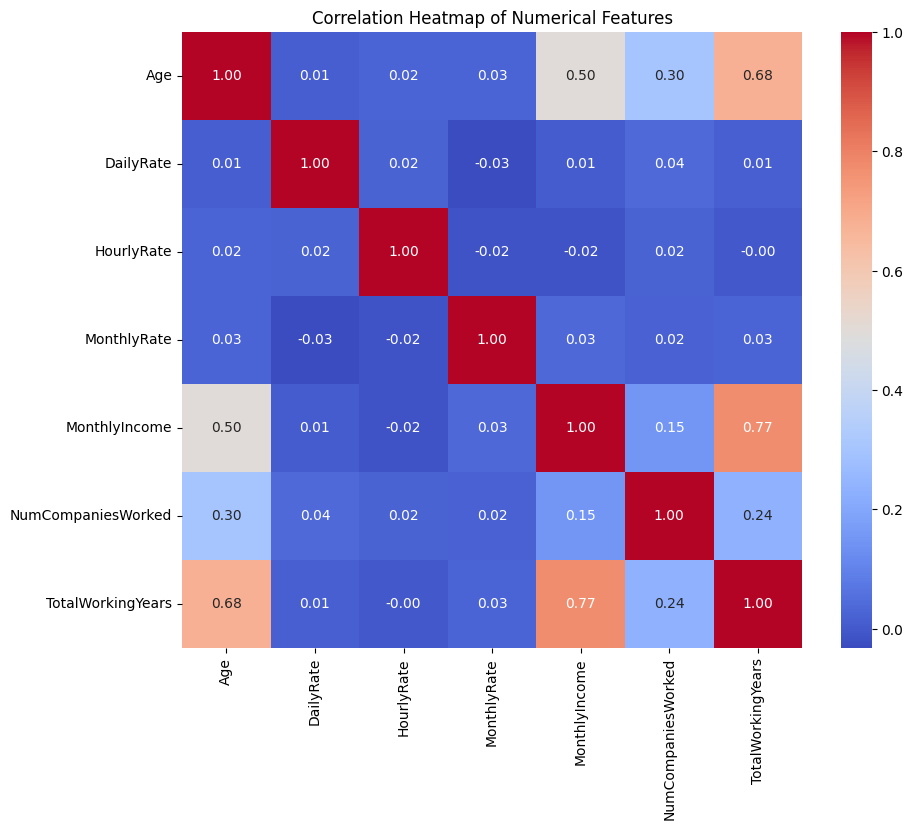

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'numerical_cols' is defined as in the previous code

plt.figure(figsize=(10, 8))
correlation_matrix = df[attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()